# Linear Regression - Ecommerce Project

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Note: Data are fake data.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


-------

# Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

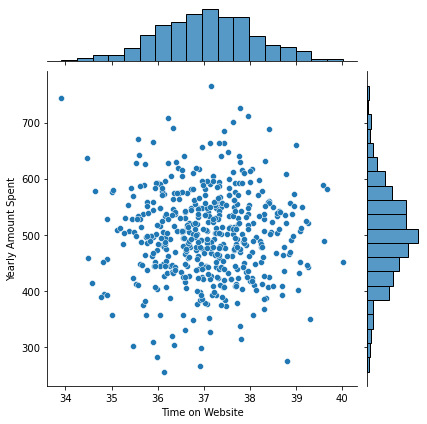

In [9]:
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent');

There seems to be no clear correlation between `Time on Website` and `Yearly Amount Spent`.

**Do the same but with the Time on App column instead.**

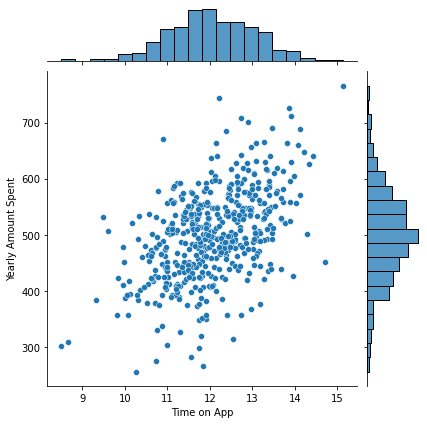

In [14]:
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent');

We can see that there is some kind of positive correlation between `Time on App` and `Yearly Amount Spent`.

--------

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

In [15]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

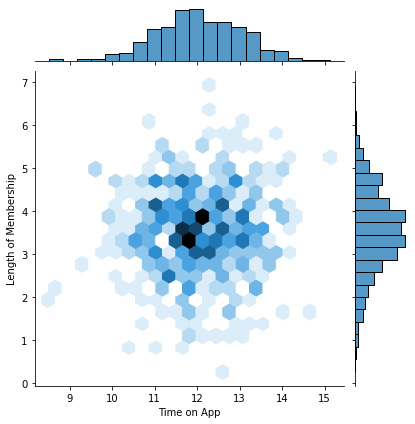

In [17]:
sns.jointplot(data=df, x='Time on App', y='Length of Membership', kind='hex');

There is some kind of cluster happening in the middle. Peoeple who have been members for between 3 to 4 tend to spend more time on the App.

--------

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

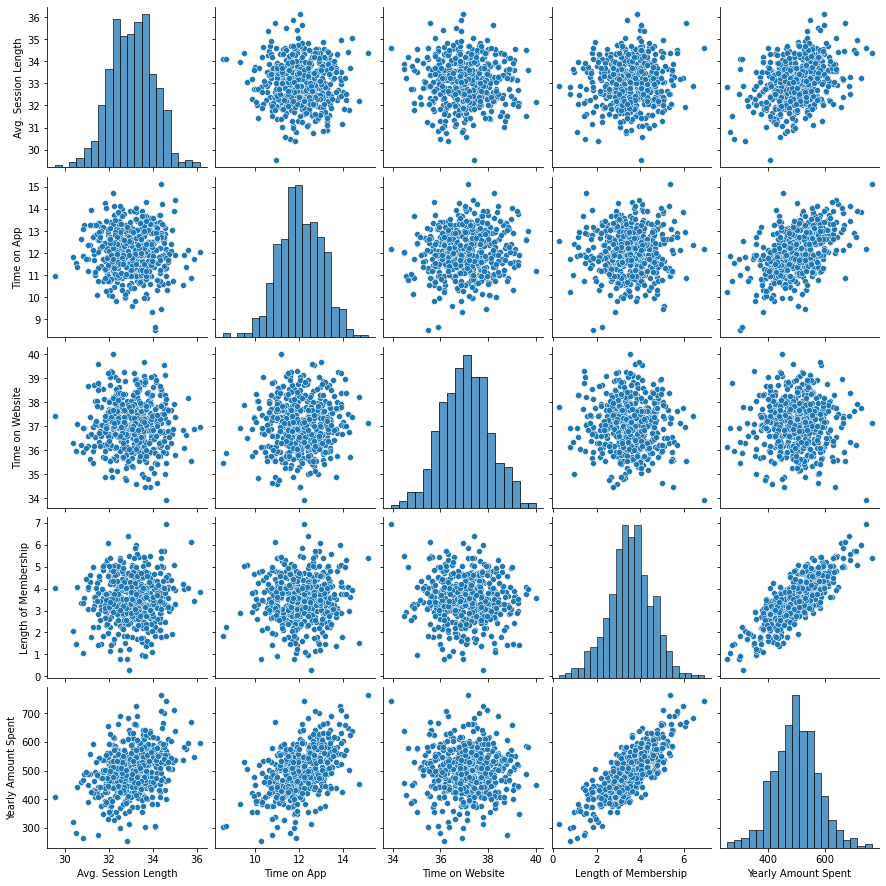

In [19]:
sns.pairplot(df);

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

* We can see that most of the data are normallly distributed.
* There is some positive correlation between `Yearly Amount Spent` and feaures like `Lenght of Membership` and `Time on App`.


**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

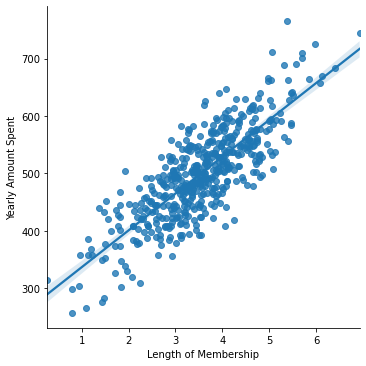

In [21]:
sns.lmplot(data=df, x='Length of Membership', y='Yearly Amount Spent');

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.**

In [22]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [23]:
# separate features and labels
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df[ 'Yearly Amount Spent']

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 4), (150, 4), (350,), (150,))

## Training the Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [34]:
lr.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [38]:
df_coef = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=['Coefficient'])

df_coef.sort_values(by='Coefficient', ascending=False)

,Coefficient
Length of Membership,61.279097
Time on App,38.590159
Avg. Session Length,25.981550
Time on Website,0.190405


### Intrepreting Coefficient

Holding all other features fixed, 

* one unit increase in `Length of Membership` is associated with an increase of \$61.28 in `Yearly Amount Spent`.
* one unit increase in `Time on App`  is associated with an increase of \$38.59 in `Yearly Amount Spent`.
* one unit increase in `TAvg. Session Length`  is associated with an increase of \$25.98 in `Yearly Amount Spent`.
* one unit increase in `Time on Website` is associated with an increase of \$0.19 in `Yearly Amount Spent`.

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Create a scatterplot of the real test values versus the predicted values.**

In [39]:
predictions = lr.predict(X_test)

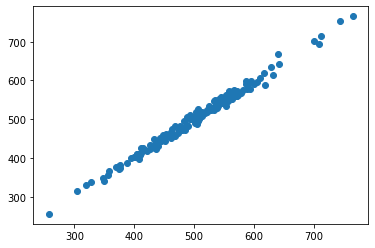

In [40]:
plt.scatter(y_test, predictions);

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [42]:
print('MAE : {}'.format(mean_absolute_error(y_test, predictions)))
print('MSE : {}'.format(mean_squared_error(y_test, predictions)))
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

MAE : 7.228148653430815
MSE : 79.81305165097429
RMSE : 8.933815066978624


In [48]:
print('Explained Variance Score: {}'.format(explained_variance_score(y_test, predictions)))

Explained Variance Score: 0.9890771231889607


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

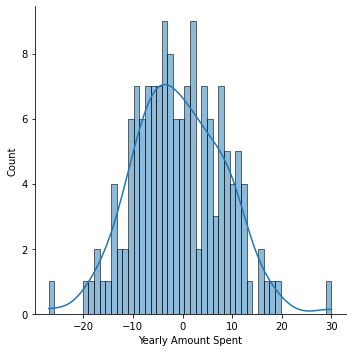

In [49]:
sns.displot(y_test - predictions, kde=True, bins=50);

It seem a good Residual Historgram as the shape is pretty normally distributed.

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below. **

In [45]:
df_coef.sort_values(by='Coefficient', ascending=False)

,Coefficient
Length of Membership,61.279097
Time on App,38.590159
Avg. Session Length,25.981550
Time on Website,0.190405


**How can you interpret these coefficients?**

Holding all other features fixed, 

* one unit increase in `Length of Membership` is associated with an increase of \$61.28 in `Yearly Amount Spent`.
* one unit increase in `Time on App`  is associated with an increase of \$38.59 in `Yearly Amount Spent`.
* one unit increase in `TAvg. Session Length`  is associated with an increase of \$25.98 in `Yearly Amount Spent`.
* one unit increase in `Time on Website` is associated with an increase of \$0.19 in `Yearly Amount Spent`.

**Do you think the company should focus more on their mobile app or on their website?**

In [46]:
38.590159/0.190405

202.67408418896562

There are multiple suggestions.

* Currently,**Mobile App** because its coefficient yields nearly 200 times for `Yearly Amount Spent` than **Website**.
* So What we can do is Company focus on **Website** to make improvements so that it can catch up with Mobile app.
* On the other hand, if company doesn't want to make changes to website and want to focus on currently performing platform, then they should focus efforts more on **Mobile App**.
* Lastly, we might want to dig deeper for `Length of Membership` between its relationship with Mobile or Website.

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.